<a href="https://colab.research.google.com/github/peter-callahan/vanderbilt/blob/main/Week_8_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Deep Learning
> Week 8 In-class Exploration

In this notebook, we explore concepts of regression and deep learning further.

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression and Cost Functions Example

Let's take this step-by-step to begin with.

In [ ]:
# Create basic linear data from class slides
demo_regr_data = np.array([[1,6],
                           [2,5],
                           [3,7],
                           [4,10]])

## Calculate model output given parameters
Now, let's calculate the output for a single training example. We know that the formula for this for a single variable model is as follows:

$$h_\theta(x) = \theta_0 + \theta_1x_1$$

or more specifically to our syntax here:

$$\hat{y}_\theta(x) = \theta_0 + \theta_1x_1$$

Let's write this...

In [ ]:
# make up some initial thetas
theta_0 = 0.22
theta_1 = 0.86

In [ ]:
# get example 0
x1, y = demo_regr_data[0]
x1, y

(1, 6)

In [ ]:
# use formula for linear regression to get output
y_hat = theta_0 + theta_1 * x1

## Error, cost, and loss
Recall our overall cost (or loss) function: 

$$J(\theta) = \frac{1}{2m}\sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$

What is the error for this one training example given these model parameters?

In [ ]:
# calculate basic error
error = y_hat - y

What is the cost associated with this training example given these model parameters?

In [ ]:
# calculate cost
cost = 0.5 * (error ** 2)

## Updating the model parameters based on gradient descent
What would gradient descent look like for this example? Recall:


$$\theta_j := \theta_j - \alpha(h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

or more specifically to our syntax here:

$$\theta_j := \theta_j - \alpha (\hat{y}_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

Keeping in mind:  
* _j_ denotes an individual parameter in a model. 
* _i_ denotes a particular training example

In [ ]:
# new parameter - learning rate
alpha = 5e-3
alpha

0.005

In [ ]:
# calculate update for theta 0
theta_0_new = theta_0 - alpha * (error) * 1
theta_0_new

0.2446

In [ ]:
# calculate update for theta 1
theta_1_new = theta_1 - alpha * (error) * x1
theta_1_new

0.8845999999999999

In [ ]:
# do the update
theta_0 = theta_0_new
theta_1 = theta_1_new

## Let's write some functions to help us out with training.

In [ ]:
def calculate_single_forward(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)
        
        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]

    # parse data inputs
    x0 = 1
    x1 = train_ex[0]
    y = train_ex[1]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1])

    # Question: what would you do differently for GD or mini-batch GD?

    return gradients

For the actual gradient descent, this is the update function:

$$\theta_j := \theta_j - \alpha \sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$


In [ ]:
def gradient_descent(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005
    
    returns: 
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iteration
    '''
    
    total_error = 0
    overall_gradients = np.zeros(2)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = calculate_single_forward(thetas, ex)
        # gradients[0] is the error term (gradients[0] = error * x0 = error * 1)
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]

    return thetas, total_error

## Let's try it out for regression!

In [ ]:
# set initial parameters
thetas = [3.44, 2.13]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 100
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(demo_regr_data, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error


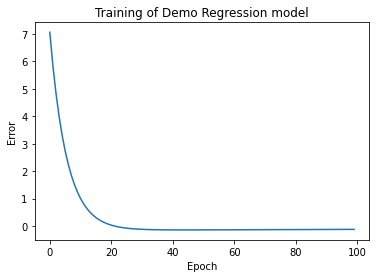

In [ ]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

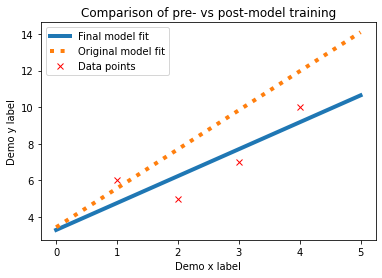

In [ ]:
# Let's look at the actual least squares
lin_pts = np.linspace(0, 5, 25) # gives you 25 values between [0, 5]
mdl_pts = thetas[0] + lin_pts * thetas[1]
plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model fit')
plt.legend()

# Let's look at the original least squares
orig_mdl_pts = old_thetas[0] + lin_pts * old_thetas[1]
plt.plot(lin_pts, orig_mdl_pts, ':', linewidth=4, label='Original model fit')
plt.legend()

# Let's plot the original points
plt.plot(demo_regr_data[:,0], demo_regr_data[:,1], 'ro', label='Data points') # 'ro' for red, circle
plt.legend()
plt.xlabel('Demo x label')
plt.ylabel('Demo y label')
plt.title('Comparison of pre- vs post-model training')

# Thoughts to consider for your homework..

## Generalizing these functions
We've already written some solid code here which could actually be used in your homework for the single variable model. We've done so by parsing out every single variable and written all of the functions specifically for this single variable model.

However, this single variable model could actually be easily expressed mathematically (i.e., as shown in the lecture), which would also allow you to generalize this to the multivariable input case. Where and how do you think you would need to change this code to achieve these results?

Also, keep in mind that $x_0$ as we defined it is the "data" which accompanies the "bias". But this value didn't come from our data, and appeared to be set. Think on why this is, and think about how this can be implemented programmatically.


## Extending to logistic regression (classification)
Another part of your homework will be in applying this code to logistic regression. Consider the following:
* What is the practical difference (i.e., in code) between the linear regression method vs the logistic regression?
* Based on these differences, what would you need to change in the code above?

## Extending to stochastic gradient descent

We've written the code for traditional gradient descent, or updates to the parameters of the model given the error from the entire training batch.

How would the code above change (or your code) to accommodate stochastic gradient descent (parameter updates based on a subset of the training data?)

What would this look like for:
* Parameter updates after **each training example**, and
* Parameter updates after/based on **a specified number of training examples** (e.g., if the user wanted to set the batch size to be 2 or 3?)

## Stopping criteria
In the in-class example, we ran the model for a number of training epochs. Thus, our stopping criteria was: training should be terminated after we have exceeded the specified number of epochs.

What are some examples of better stopping criteria?